# Two-sample independent t-test

In this example we are interested in comparing the amount of time elapsed between a client request and stream availability for the company AAVAIL’s streaming servers. Specifically we want to compare our locally hosted servers to a cloud service in terms of speed. The data are arrival times (in seconds) for a stream, meaning the time it takes from submission to receive a link with the modified version of the stream.

Remember to formalize your hypothesis.

1. Pose your **question** - Is it faster, on average, to process streams for viewing on a cloud service compared to our locally hosted servers?
1. Find the relevant **population** - The population consists of all possible streams
1. Specify a **null hypothesis** - There is no difference, on average, between local and hosted services for stream processing times location after I submit my ride request.
1. Select the test and the significance level, two-sample independent t-test with **α=0.05**


## Imports and Matplotlib settings

In [6]:
import re
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

This is the data we collected

In [2]:
local_arrivals = np.array([3.99, 4.15, 6.88, 4.53, 5.65, 6.75, 7.13, 2.79, 6.20,
                           3.72, 7.28, 5.23, 4.72, 1.04, 4.25, 4.71, 2.16, 3.46,
                           3.41, 7.98, 0.75, 3.64, 6.25, 6.86, 4.71])
hosted_arrivals = np.array([5.82, 4.83, 7.19, 6.98, 5.82, 5.25, 5.71, 5.59, 7.93,
                            7.09, 6.37, 6.31, 6.28, 3.12, 6.02, 4.84, 4.16, 6.72,
                            7.44, 6.28, 7.37, 4.27, 6.15, 4.88, 7.78])

Now test for significance using t-test:

In [5]:
test_statistic, pvalue = stats.ttest_ind(local_arrivals,hosted_arrivals)
print("p-value: {}".format(round(pvalue,5)))

p-value: 0.0069


[]

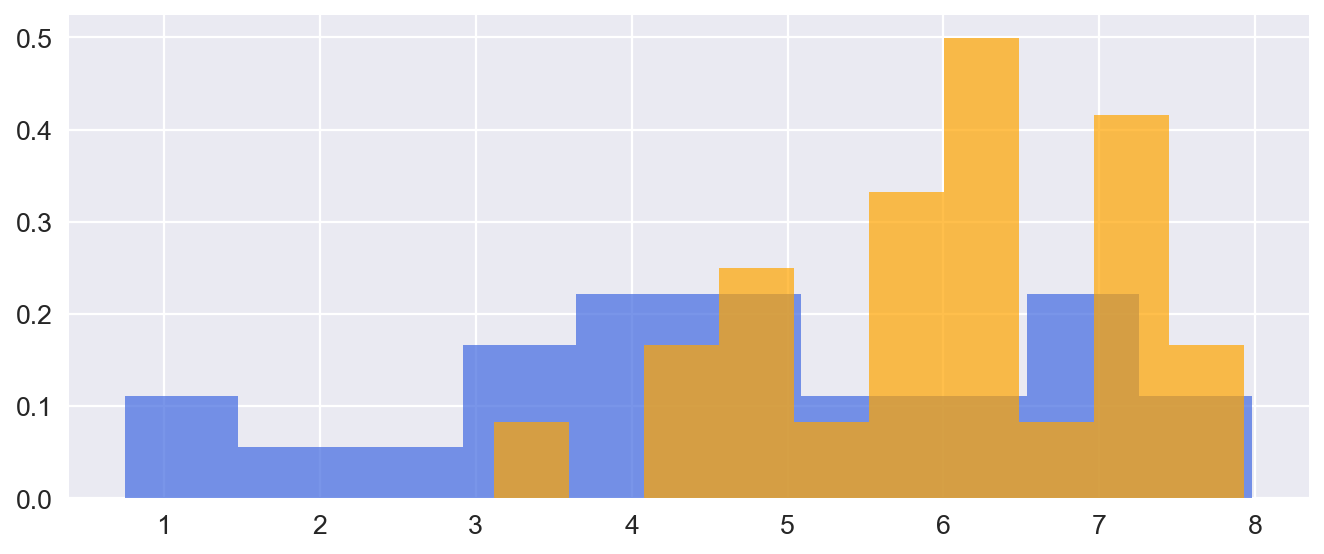

In [12]:
BINS = 10
fig = plt.figure(figsize=(10,4), dpi=160, facecolor='white')
ax = fig.add_subplot(111)
ax.hist(local_arrivals, bins=BINS, facecolor='royalblue', alpha=0.7, density=1, histtype='stepfilled')
ax.hist(hosted_arrivals, bins=BINS, facecolor='orange', alpha=0.7, density=1, histtype='stepfilled')
ax.plot()

Can't say variance is the same (doesn't look like it), so use Welch's (unequal variances) t-test:

In [13]:
test_statistic, pvalue = stats.ttest_ind(local_arrivals, hosted_arrivals, equal_var = False)
print("p-value: {}".format(round(pvalue,5)))

p-value: 0.00735


# Three-sample testing - ANOVA

Suppose we have a third set of data we want to include in analysis

In [21]:
local_arrivals = np.array([3.99, 4.15, 7.88, 4.53, 5.65, 6.75, 7.13, 3.79, 6.20,
                           3.72, 7.28, 5.23, 4.72, 2.04, 4.25, 4.71, 3.16, 3.46,
                           3.41, 7.98, 0.75, 3.64, 6.25, 6.86, 4.71])
cloud1_arrivals = np.array([5.82, 4.83, 7.19, 6.98, 5.82, 5.25, 5.71, 5.59, 6.93,
                            7.09, 6.37, 6.31, 6.28, 3.12, 6.02, 4.84, 4.16, 6.72,
                            7.44, 6.28, 6.37, 4.27, 6.15, 4.88, 6.78])
cloud2_arrivals = np.array([5.73, 4.95, 6.96, 6.12, 5.85, 6.74, 5.19, 7.24,
                            6.08, 6.11, 6.11, 7.68, 4.66, 6.12, 5.04, 4.19, 6.46,
                            7.02, 7.28, 6.19, 4.67, 7.15, 4.58, 6.01])

Compute some summary statistics:

In [22]:
all_arrivals = [local_arrivals, cloud1_arrivals, cloud2_arrivals]
global_mean = np.hstack(all_arrivals).mean()

print("The global mean arrival time is: %s"%np.round(global_mean, decimals=2))

for name, arrivals in zip(['local', 'cloud1', 'cloud2'], all_arrivals):
    print("Mean arrival time for {} is {}".format(name, np.round(arrivals.mean(), decimals=2)))
    

The global mean arrival time is: 5.59
Mean arrival time for local is 4.89
Mean arrival time for cloud1 is 5.89
Mean arrival time for cloud2 is 6.01


When comparing across three or more groups (in this case types of promotions) an appropriate test is a one-way ANOVA, which compares between group variation and within group variation. The relevant probability distribution if the F distribution, and that is the name used in the relevant method in Scipy:

In [23]:
test_statistic, pvalue = stats.f_oneway(*all_arrivals)
print(np.round(pvalue,decimals=4))


0.0082


# Correcting for multiple tests

In [25]:
import numpy as np
from statsmodels.stats.multitest import multipletests

pvals = np.random.uniform(0.001,0.06,12)
_results = multipletests(pvals, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
rejected_bonferroni,adjusted_bonferroni = _results[0],_results[1]

_results = multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
rejected_bh,adjusted_bh = _results[0],_results[1]

for p,pval in enumerate(pvals):
     print(round(pval,3),round(adjusted_bonferroni[p],3),round(adjusted_bh[p],3))
     

0.038 0.461 0.051
0.042 0.51 0.051
0.032 0.382 0.051
0.008 0.1 0.038
0.052 0.623 0.057
0.057 0.685 0.057
0.042 0.505 0.051
0.013 0.152 0.038
0.007 0.088 0.038
0.024 0.292 0.051
0.039 0.471 0.051
0.01 0.118 0.038


In [27]:
pvals

array([0.0384287 , 0.04249133, 0.03182133, 0.00835309, 0.05194435,
       0.05704761, 0.0420783 , 0.01267608, 0.00734372, 0.02432679,
       0.03926011, 0.00981133])

[]

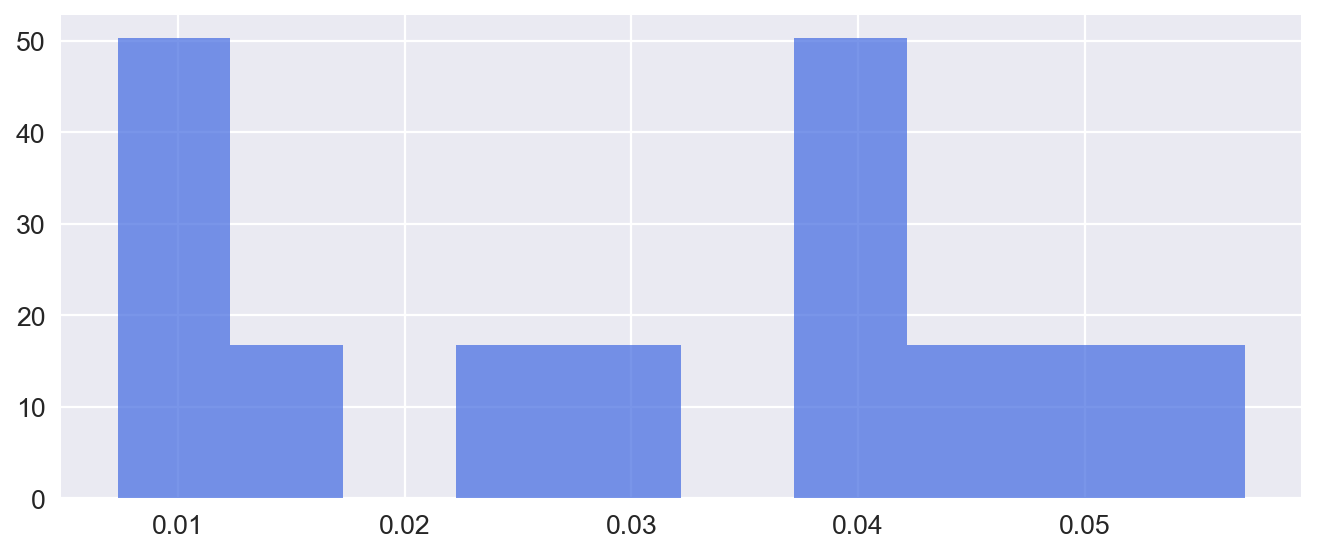

In [26]:
fig = plt.figure(figsize=(10,4), dpi=160, facecolor='white')
ax = fig.add_subplot(111)
ax.hist(pvals, bins=BINS, facecolor='royalblue', alpha=0.7, density=1, histtype='stepfilled')
ax.plot()